In [89]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def img_show(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure("Image") # 图像窗口名称
    plt.imshow(img_rgb)
    plt.axis('off') # 关掉坐标轴为 off
    plt.show()

bull_color_dist = {'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([26, 255, 255])},          
              'blue': {'Lower': np.array([108, 88, 58]), 'Upper': np.array([118, 255, 255])},
              'green': {'Lower': np.array([55, 40, 40]), 'Upper': np.array([80, 255, 255])},
              'none': {'Lower': np.array([0, 0, 0]), 'Upper': np.array([255, 255, 255])},}

# 摄像头内参
mtx = np.array([[1.35635605e+03, 0.00000000e+00, 6.46212314e+02],
       [0.00000000e+00, 1.35578874e+03, 3.78009469e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist = np.array([[-2.52464877e-01, 1.92828476e-01, -6.55508668e-04, 2.48903668e-03, -7.45335496e-01]])

In [90]:
img = cv2.imread("./imgsrc/1.jpg")

dst = cv2.undistort(img, mtx, dist, None, mtx)

hsv_img = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

inRange_hsv = cv2.inRange(hsv_img,
                            bull_color_dist["red"]["Lower"], 
                            bull_color_dist["red"]["Upper"])

edges = cv2.Canny(inRange_hsv,50,150,apertureSize = 3)

In [91]:
circle = cv2.HoughCircles(inRange_hsv, cv2.HOUGH_GRADIENT, 3, 60,
                        param1=100, param2=75, minRadius=100, maxRadius=150)

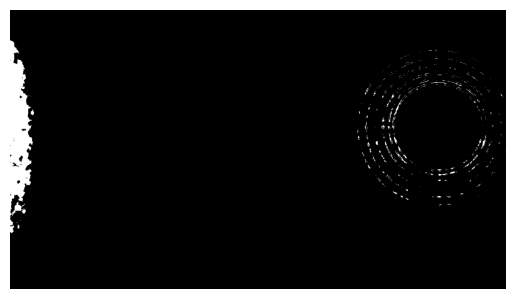

In [92]:
img_show(inRange_hsv)

In [93]:
# 勿删！！！
# 识别物体轮廓测试

# contours, hierarchy = cv2.findContours(inRange_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# res_con = []
# for contour in contours:
#     if len(contour) > len(res_con):
#         res_con = contour

# x, y, w, h = cv2.boundingRect(res_con)
# print(x,y)

# con_img = cv2.drawContours(dst, res_con, -1, (0, 0, 255), 3)

# img_show(con_img)

In [2]:
def color_sum(color_list):
    red = 0
    green = 0
    blue = 0
    for color in color_list:
        if color == "red":
            red +=1
        elif color == "green":
            green += 1
        elif color == "blue":
            blue += 1
        else:
            pass
    dict = {red:"red", green:"green", blue:"blue"}
    return dict[sorted([red, green, blue])[2]]

print(color_sum(["red", "green", "green", "green", "blue", "blue"]))

green


In [18]:
import cv2
cap = cv2.VideoCapture(0)

[ WARN:0@128.170] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@128.181] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range
